## MATH 152 Lab  3

Put team members' names and section number here.

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
x, y = sp.symbols('x y', real=True)
f = sp.log(1 + x)        
b = sp.E**(-1)          
L = sp.log(1 + b)        


Instructions: Complete the lab assignment in your assigned groups. Unless stated otherwise, your answers should be obtained using Python code.

Do not modify the cell above, as it contains all the packages you will need. It is highly recommended to not use any additional packages.

NOTE: Approximate answers are acceptable for all non-plotting parts of this week's lab.

### Question 1

#### 1a

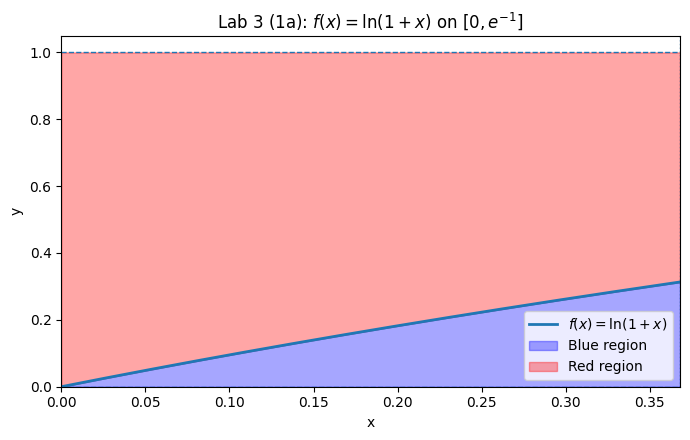

In [6]:
X = np.linspace(0, float(sp.N(b)), 1200)
Y = np.log1p(X)

plt.figure(figsize=(7,4.5))
plt.plot(X, Y, label=r"$f(x)=\ln(1+x)$", linewidth=2)
plt.axhline(0, ls="--", lw=1)
plt.axhline(1, ls="--", lw=1)
plt.axvline(float(sp.N(b)), ls=":", lw=1)

# Blue region between y=0 and f(x)
plt.fill_between(X, Y, 0, color="blue", alpha=0.35, label="Blue region")

# Red region between y=1 and f(x)
plt.fill_between(X, Y, 1, color="red", alpha=0.35, label="Red region")

plt.xlim(0, float(sp.N(b)))
plt.ylim(0, 1.05)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Lab 3 (1a): $f(x)=\ln(1+x)$ on $[0,e^{-1}]$")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


#### 1b

In [7]:
combined_area = sp.simplify(b * 1)
print("1(b) Combined area = ", combined_area, "≈", sp.N(combined_area))


1(b) Combined area =  exp(-1) ≈ 0.367879441171442


#### 1c

In [8]:
# Method 1: chain rule ∫ x f'(x) dx + top strip
red_partial = sp.integrate(x * sp.diff(f, x), (x, 0, b))
red_topstrip = b * (1 - L)
red_chain_full = sp.simplify(red_partial + red_topstrip)

# Method 2: rectangle – blue area
blue_area = sp.integrate(f, (x, 0, b))
red_rect_minus_blue = sp.simplify(combined_area - blue_area)

# Method 3: horizontal integration (dy)
red_dy = sp.integrate(sp.E**y - 1, (y, 0, L)) + b * (1 - L)
red_dy = sp.simplify(red_dy)

print("1(c) Red area results:")
print("  Chain rule (full)        =", red_chain_full, "≈", sp.N(red_chain_full))
print("  Rectangle − Blue        =", red_rect_minus_blue, "≈", sp.N(red_rect_minus_blue))
print("  dy method               =", red_dy, "≈", sp.N(red_dy))

print("\nAgreement checks:")
print(" chain vs rect :", sp.simplify(red_chain_full - red_rect_minus_blue) == 0)
print(" chain vs dy   :", sp.simplify(red_chain_full - red_dy) == 0)

1(c) Red area results:
  Chain rule (full)        = (-log((1 + E)**(1 + E)) + E + 3)*exp(-1) ≈ 0.307254660280035
  Rectangle − Blue        = (-log((1 + E)**(1 + E)) + E + 3)*exp(-1) ≈ 0.307254660280035
  dy method               = (-log((1 + E)**(1 + E)) + E + 3)*exp(-1) ≈ 0.307254660280035

Agreement checks:
 chain vs rect : True
 chain vs dy   : True


### Question 2

#### 2a

In [9]:
print("Part 2(a):")
print("u  = cos^(n-1)(x)")
print("dv = cos(x) dx")
print("du = -(n-1)cos^(n-2)(x)sin(x) dx")
print("v  = sin(x)")

Part 2(a):
u  = cos^(n-1)(x)
dv = cos(x) dx
du = -(n-1)cos^(n-2)(x)sin(x) dx
v  = sin(x)


#### 2b

**Nothing here is needed.**

#### 2c

In [10]:
def F(n):
    """
    Recursive antiderivative for ∫ cosⁿ(x) dx
      F(0)=x
      F(1)=sin(x)
      F(n)=sin(x)cosⁿ⁻¹(x)/n + ((n−1)/n) F(n−2)
    """
    if not isinstance(n, int) or n < 0:
        return "Invalid input."
    if n == 0:
        return x
    if n == 1:
        return sp.sin(x)
    return sp.Rational(1, n)*sp.sin(x)*sp.cos(x)**(n-1) + sp.Rational(n-1, n)*F(n-2)

#### 2d

In [12]:
F2, F7 = F(2), F(7)
Fm1, Fstr = F(-1), F("abc")

direct2 = sp.integrate(sp.cos(x)**2, x)
direct7 = sp.integrate(sp.cos(x)**7, x)

print("2(d) Recursive tests")
print(" F(2)= ", sp.simplify(F2))
print(" Direct ∫cos²x = ", sp.simplify(direct2))
print(" Diff =", sp.simplify(F2 - direct2))
print("\n F(7)= ", sp.simplify(F7))
print(" Direct ∫cos⁷x = ", sp.simplify(direct7))
print(" Diff =", sp.simplify(F7 - direct7))
print("\n F(-1)= ", Fm1)
print(" F('abc') = ", Fstr)

2(d) Recursive tests
 F(2)=  x/2 + sin(2*x)/4
 Direct ∫cos²x =  x/2 + sin(2*x)/4
 Diff = 0

 F(7)=  (5*cos(x)**6 + 6*cos(x)**4 + 8*cos(x)**2 + 16)*sin(x)/35
 Direct ∫cos⁷x =  (-sin(x)**6/7 + 3*sin(x)**4/5 + cos(x)**2)*sin(x)
 Diff = 0

 F(-1)=  Invalid input.
 F('abc') =  Invalid input.
 Diff = 0

 F(-1)=  Invalid input.
 F('abc') =  Invalid input.
